In [3]:
import pandas as pd
raw=pd.read_table('/Users/jinxing/Desktop/担保圈/danbaotest.txt',delimiter='|')

In [4]:
len(raw)

5757

In [9]:
#raw.to_csv('/Users/jinxing/Desktop/担保圈/test.csv',index = None) #转到csv
#df = pd.read_csv('/Users/jinxing/Desktop/担保圈/test.csv')

In [5]:
raw.drop(columns = ['Cust_Name'], inplace = True)

In [ ]:
raw.head(10)

In [95]:
cleaned_raw = raw.dropna() #清除含有null的行后的干净数据

len(cleaned_raw)

5306

In [103]:
cleaned_raw.to_csv('cleanedata.csv',index = False)

In [ ]:
n_work = pd.read_table('cleanedata.csv',delimiter=',')
n_work.head(10)

In [158]:
source = n_work['BCS_PTY_ID'] 
target = n_work['BCS_assoc_pty_id']
group = n_work['Pty_Rela_Type_Cd']

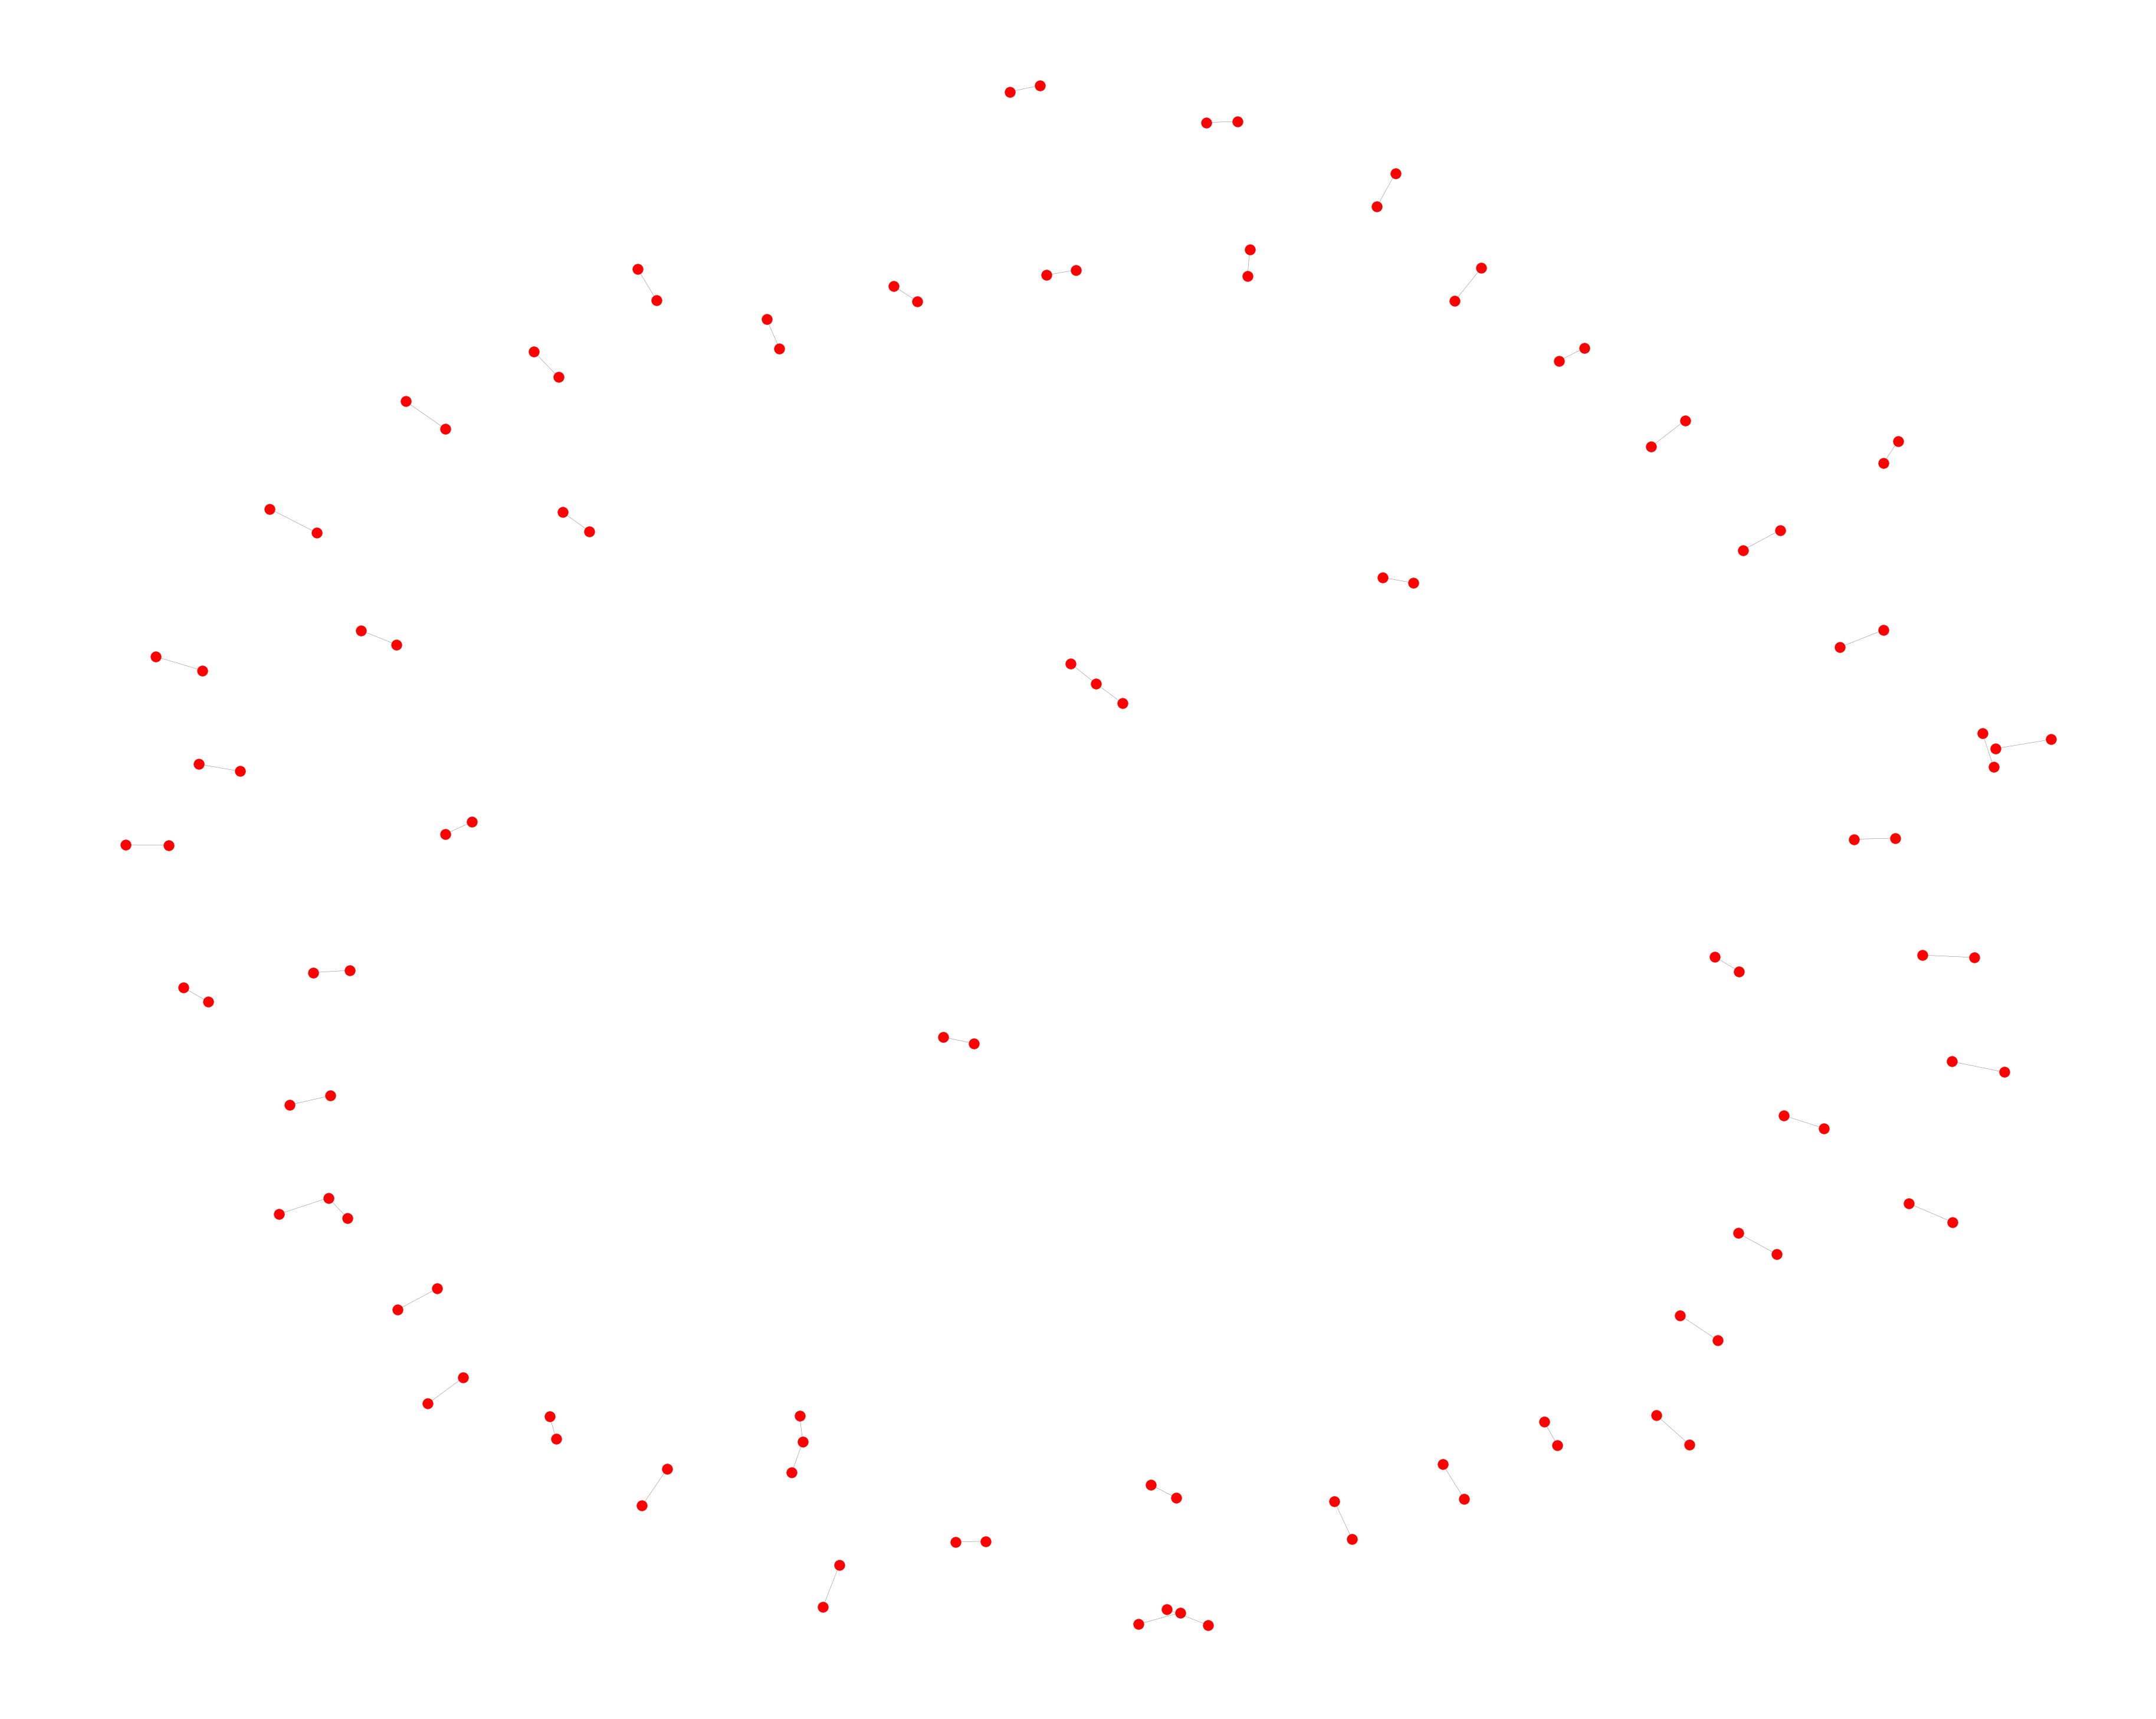

In [157]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G1 = nx.Graph()

for i in range(1000):
    if relation[i] == 'CMS0_F002':
        G.add_edge(source[i],target[i])
        
pos = nx.fruchterman_reingold_layout(G)
"""
nx.draw_networkx_nodes(G, pos, node_size=1,alpha=0.8,)
nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=2)
"""
fig = plt.figure(figsize=(50, 40),facecolor='white')

nx.draw(G, pos, node_shape = 'o', cmap=plt.cm.gray, edge_color = 'gray', width = 0.5, arrows = True)
plt.show()



In [ ]:
nodelistfrom = []
for i in range(100):
    nodelistfrom.append(source[i])
nodelistfrom

NetworkXError: Node 1 has no position.

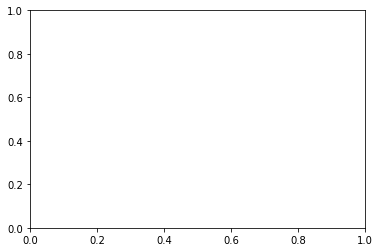

In [144]:
pos = nx.fruchterman_reingold_layout(G1)
nx.draw_networkx_nodes(G1,pos,
                       nodelist = [1,2,3,4],
                       node_color = 'red',
                       node_size = 1,
                       alpha=0.8)

In [160]:
# read in node attributes as list of tuples
group_attr = []
for line in open('cleanedata.csv', 'rb'):
    group_attr.append(tuple(line.rstrip().split(',')))
# convert list of tuples into a dict
group_attr_dict = dict(set(sorted(group_attr)))
# set nodes attributes
nx.set_node_attributes(g,"group", group_attr_dict)
# create empty list for node colors
node_color = []
# for each node in the graph
for node in g.nodes(data=True):
    if 'CMS0-F001' in node[1]['group']:
        node_color.append('blue')
 # if the node has the attribute group1
    elif 'group2' in node[1]['group']:
        node_color.append('red')
 # if the node has the attribute group1
    elif 'group3' in node[1]['group']:
        node_color.append('green')
 # if the node has the attribute group1
    elif 'group4' in node[1]['group']:
        node_color.append('yellow')
 # if the node has the attribute group1
    elif 'group5' in node[1]['group']:
        node_color.append('orange') 
# draw graph with node attribute color
nx.draw(g, with_labels=False, node_size=25, node_color=node_color)

TypeError: a bytes-like object is required, not 'str'

In [169]:
#关系链条
chain_test = pd.read_csv('/Users/jinxing/cleanedata.csv')

In [172]:
cleaned_chain = chain_test.dropna()
len(cleaned_chain)

2093